In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.6.0


In [3]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

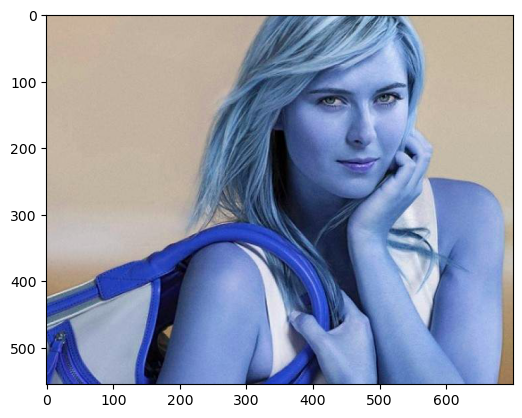

In [4]:
plt.imshow(img)
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

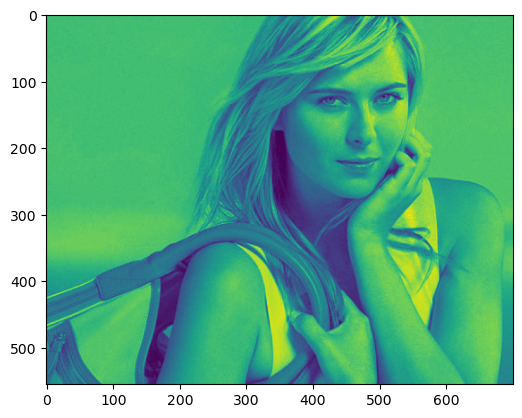

In [6]:
plt.imshow(gray)
plt.show()

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]

x,y,w,h

(352, 38, 233, 233)

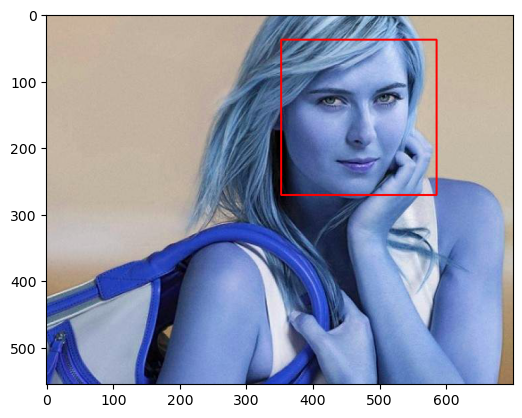

In [9]:
face = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
plt.imshow(face)
plt.show()

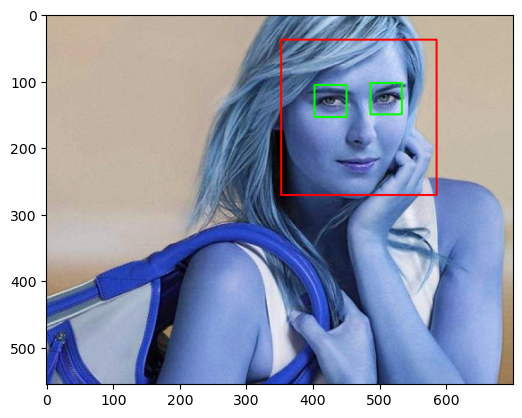

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face = cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face,cmap='gray')
plt.show()

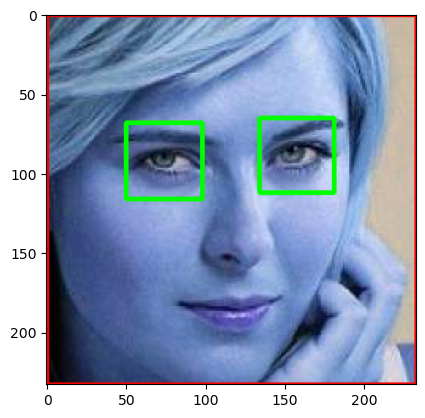

In [11]:
plt.imshow(roi_color, cmap='gray')
plt.show()

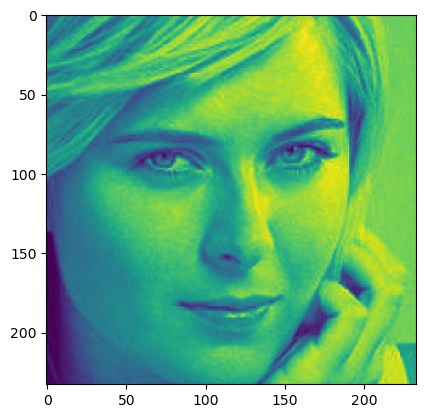

In [12]:
plt.imshow(roi_gray)
plt.show()

In [13]:
def get_cropped_face_if_valid(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

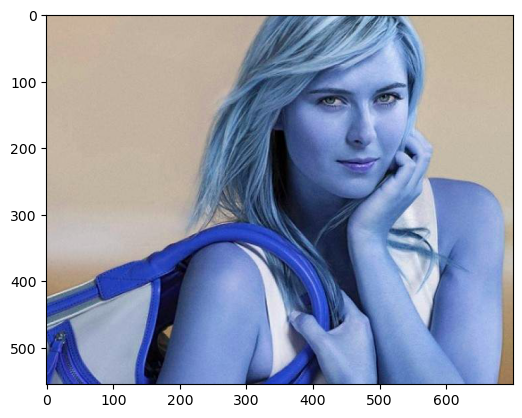

In [14]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

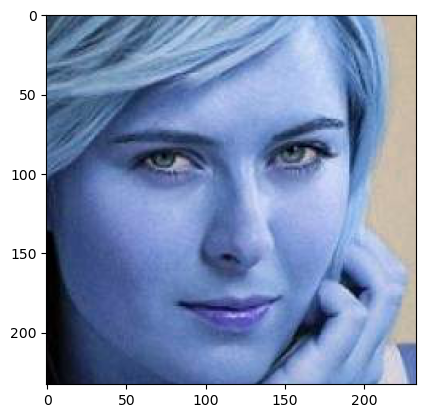

In [15]:
cropped_image_face = get_cropped_face_if_valid('./test_images/sharapova1.jpg')
plt.imshow(cropped_image_face)

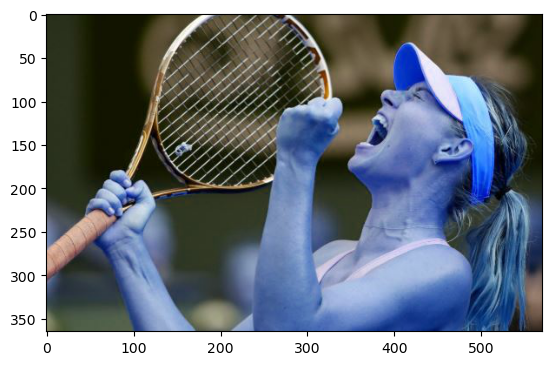

In [16]:
invalid_image = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(invalid_image)

In [17]:
detection  = get_cropped_face_if_valid('./test_images/sharapova2.jpg')
detection

In [31]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [38]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [39]:
img_dirs

['./dataset/maria_sharapova',
 './dataset/virat_kohli',
 './dataset/lionel_messi',
 './dataset/serena_williams',
 './dataset/roger_federer']

In [40]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [41]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        print(entry.path)
        roi_color = get_cropped_face_if_valid(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped Images in folder: ", cropped_folder)
            
            cropped_file_name = celebrity_name + str(count)+'.png'
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

maria_sharapova
./dataset/maria_sharapova/unnamed (2).jpg
./dataset/maria_sharapova/002831aab808e5488d75de92ec4fb939.jpg
Generating cropped Images in folder:  ./dataset/cropped/maria_sharapova
./dataset/maria_sharapova/monochrome-maria-sharapova-face-wallpaper-65016-67225-hd-wallpapers.jpg
./dataset/maria_sharapova/Sharapova_at_the_Mutua_Madrid_Open_2015.jpg
./dataset/maria_sharapova/12009b578d60268f36fcd7f2dcf7a04d.jpg
./dataset/maria_sharapova/DmWCxE.jpg
./dataset/maria_sharapova/2015070814363485712044768374.jpg
./dataset/maria_sharapova/Maria-Sharapova-women-singles-event-US-Open-2006.jpg
./dataset/maria_sharapova/maria-sharapova-praises-roger-federer-for-his-offcourt-life.jpg
./dataset/maria_sharapova/2-70.jpg
./dataset/maria_sharapova/Maria_Sharapova_women-169589.jpg
./dataset/maria_sharapova/maria-sharapova-australian-open.jpg
./dataset/maria_sharapova/Grigor-Dimitrov-with-Mario-Sharapova-1-1280x720.jpg
./dataset/maria_sharapova/104680979-GettyImages-466647961.jpg
./dataset/maria

./dataset/virat_kohli/1146943f73.jpg
./dataset/virat_kohli/3e6d62bc8e.jpg
./dataset/virat_kohli/71ed3d75ae.jpg
./dataset/virat_kohli/37d3f53e84.jpg
./dataset/virat_kohli/0b53cce8c6.jpg
./dataset/virat_kohli/bb41267a29.jpg
./dataset/virat_kohli/a18f264208.jpg
./dataset/virat_kohli/d3b3c15c31.jpg
./dataset/virat_kohli/ce8509c4a3.jpg
./dataset/virat_kohli/5a3384f779.jpg
./dataset/virat_kohli/7fde5779f6.jpg
./dataset/virat_kohli/83cf04fd82.jpg
./dataset/virat_kohli/266f9eacf3.jpg
./dataset/virat_kohli/49f7355f97.jpg
./dataset/virat_kohli/924c3e8a40.jpg
./dataset/virat_kohli/f4f9df9fcc.jpg
./dataset/virat_kohli/4cbef36ff6.jpg
./dataset/virat_kohli/2018439965.jpg
./dataset/virat_kohli/7e224dbc5c.jpg
./dataset/virat_kohli/631e46db26.jpg
lionel_messi
./dataset/lionel_messi/IMG_20200131_151915.jpg
Generating cropped Images in folder:  ./dataset/cropped/lionel_messi
./dataset/lionel_messi/avatar-leomessi.png
./dataset/lionel_messi/wct4vk5iipilmbxx_1589950679.jpeg
./dataset/lionel_messi/NINTCHDBP

./dataset/roger_federer/Roger-Federer-wife-Mirka-Federer-1009792-1280x720.jpg
./dataset/roger_federer/GettyImages-1161653186.jpg
./dataset/roger_federer/833491-jzwrfgakxz-1491130217.jpg
./dataset/roger_federer/Roger-Federer-Full-Press-conference-after-S-Finals-loss.jpg
./dataset/roger_federer/federer-wimbledon.jpg
./dataset/roger_federer/roger-federer-s-daughters-myla-rose-and-charlene-riva-turn-9.jpg
./dataset/roger_federer/ed9602a9fb1ed29e817aa5cf91bd1fe7.jpg
./dataset/roger_federer/Federer_640 (1).jpg
./dataset/roger_federer/1256138.jpg
./dataset/roger_federer/how-roger-federer-rafael-nadal-and-novak-djokovic-changed-tennis-history-like-no-other.jpg
./dataset/roger_federer/FEDERER_16b9e25e144_large.jpg
./dataset/roger_federer/20170429_Match_for_Africa_149.jpg
./dataset/roger_federer/maxresdefault.jpg
./dataset/roger_federer/gettyimages-1089315298.jpg
./dataset/roger_federer/88m_ilrAGFA.jpg
./dataset/roger_federer/rogerfederer_perfect_82463094_646872489387563_6528719341074753867_n (1

error: OpenCV(4.6.0) /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [42]:
celebrity_file_names_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova/maria_sharapova1.png',
  './dataset/cropped/maria_sharapova/maria_sharapova2.png',
  './dataset/cropped/maria_sharapova/maria_sharapova3.png',
  './dataset/cropped/maria_sharapova/maria_sharapova4.png',
  './dataset/cropped/maria_sharapova/maria_sharapova5.png',
  './dataset/cropped/maria_sharapova/maria_sharapova6.png',
  './dataset/cropped/maria_sharapova/maria_sharapova7.png',
  './dataset/cropped/maria_sharapova/maria_sharapova8.png',
  './dataset/cropped/maria_sharapova/maria_sharapova9.png',
  './dataset/cropped/maria_sharapova/maria_sharapova10.png',
  './dataset/cropped/maria_sharapova/maria_sharapova11.png',
  './dataset/cropped/maria_sharapova/maria_sharapova12.png',
  './dataset/cropped/maria_sharapova/maria_sharapova13.png',
  './dataset/cropped/maria_sharapova/maria_sharapova14.png',
  './dataset/cropped/maria_sharapova/maria_sharapova15.png',
  './dataset/cropped/maria_sharapova/maria_sharapova16.png',
  './dataset/c

In [18]:
import numpy as np
import pywt
import cv2

In [26]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float64(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H*=255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

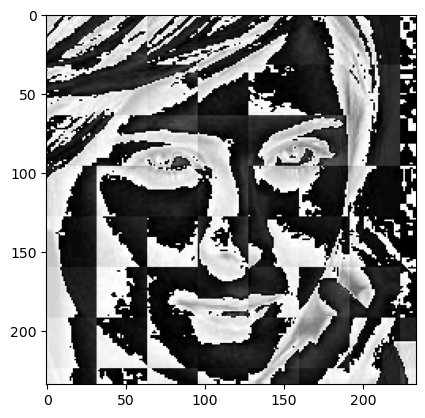

In [27]:
im_har = w2d(cropped_image_face,'db1',5)
plt.imshow(im_har,cmap='gray')

In [43]:
celeb_class = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    celeb_class[celebrity_name]= count
    count+=1

celeb_class

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'serena_williams': 3,
 'roger_federer': 4}

In [45]:
X,y= [], []

for celebrity , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har,(32,32))
        stacked_img = np.vstack((scaled_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        X.append(stacked_img)
        y.append(celeb_class[celebrity])

In [48]:
len(X)

171

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(171, 4096)

In [50]:
X[0]

array([173., 174., 174., ..., 253., 254., 252.])

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8571428571428571

In [53]:
len(X_test)

35

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.83      1.00      0.91        10
           2       0.88      1.00      0.93         7
           3       0.83      0.62      0.71         8
           4       0.67      0.67      0.67         3

    accuracy                           0.86        35
   macro avg       0.84      0.83      0.83        35
weighted avg       0.86      0.86      0.85        35



In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
model_params = {
    'svm':{
        'model': svm.SVC(gamma='auto',probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators': [1,5,10]
        }
        
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params':{
            'logisticregression__C': [1,5,10]
        }
        
    }
}

In [62]:
scores = []
best_estimators = {}
import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.675661,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.581217,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.705026,{'logisticregression__C': 1}


In [63]:
best_estimators['svm'].score(X_test,y_test)

0.8571428571428571

In [64]:
best_estimators['random_forest'].score(X_test,y_test)

0.6857142857142857

In [65]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8857142857142857

In [66]:
best_clf = best_estimators['svm']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 6,  0,  1,  0,  0],
       [ 0, 10,  0,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 2,  0,  1,  5,  0],
       [ 0,  0,  0,  1,  2]])

Text(95.72222222222221, 0.5, 'Truth')

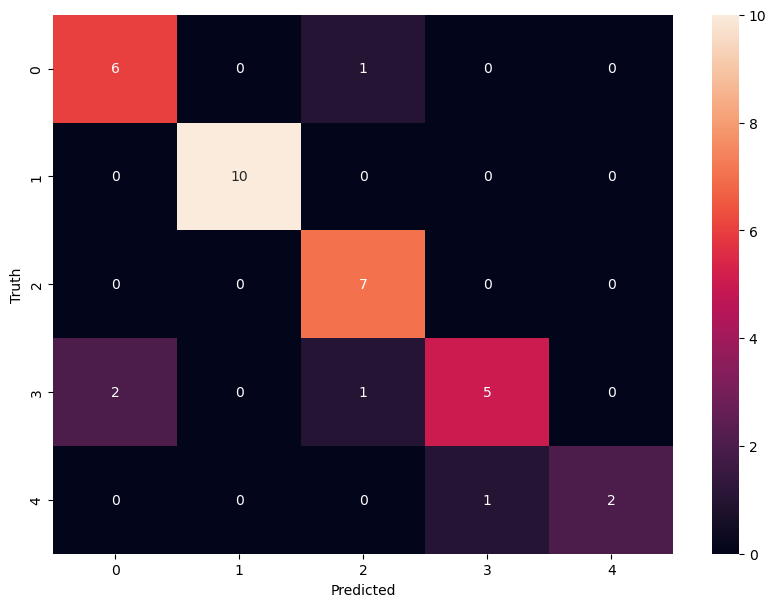

In [68]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
import joblib
joblib.dump(best_clf, 'image_classification.pkl')

['image_classification.pkl']

In [70]:
import json

with open ('celebrity_class.json', 'w') as f:
    f.write(json.dumps(celeb_class))